In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

In [3]:
file_path1 = 'ThiTNTHPT2020.xlsx'
df_20 = pd.read_excel(file_path1)
file_path2 = 'ThiTNTHPT2021.xlsx'
df_21 = pd.read_excel(file_path2)
file_path3 = 'ThiTNTHPT2022.xlsx'
df_22 = pd.read_excel(file_path3)
file_path4 = 'ThiTNTHPT2023.xlsx'
df_23 = pd.read_excel(file_path4)
file_path5 = 'ThiTNTHPT2024.xlsx'
df_24 = pd.read_excel(file_path5)

In [4]:
df_20['year'] = '2020'
df_21['year'] = '2021'
df_22['year'] = '2022'
df_23['year'] = '2023'
df_24['year'] = '2024'

In [5]:
for df in [df_20, df_21, df_22, df_23, df_24]:
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df['vat_li'] = pd.to_numeric(df['vat_li'], errors='coerce')

In [6]:
df_all = pd.concat([df_20, df_21, df_22, df_23, df_24], ignore_index=True)

In [7]:
# Tính tổng điểm cho tổ hợp A,B,C,D và thay thế các giá trị NaN bằng 0
df_all['A'] = df_all['toan'].fillna(0) + df_all['vat_li'].fillna(0) + df_all['hoa_hoc'].fillna(0)

df_all['A1'] = df_all['toan'].fillna(0) + df_all['vat_li'].fillna(0) + df_all['ngoai_ngu'].fillna(0)

df_all['B'] = df_all['toan'].fillna(0) + df_all['sinh_hoc'].fillna(0) + df_all['hoa_hoc'].fillna(0)

df_all['C'] = df_all['ngu_van'].fillna(0) + df_all['lich_su'].fillna(0) + df_all['dia_li'].fillna(0)

df_all['D'] = df_all['toan'].fillna(0) + df_all['ngoai_ngu'].fillna(0) + df_all['ngu_van'].fillna(0)

# Danh sách các tổ hợp điểm cần phân tích
combines = ['A', 'A1', 'B', 'C', 'D']

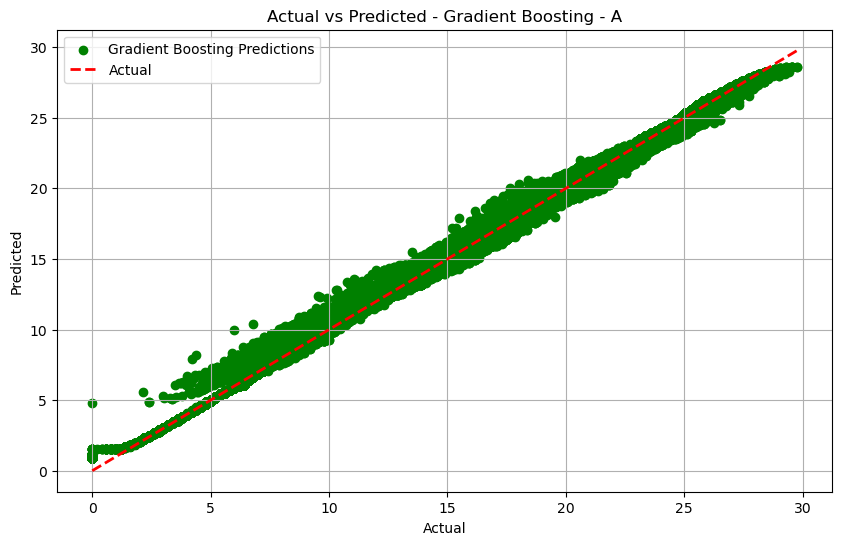

In [27]:
# Chuẩn bị cột x và y
X = df_all.drop(columns=['A', 'A1', 'B', 'C', 'D', 'year', 'sbd'])  
y = df_all['A']  

# lọc những thằng không có giá trị 
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# huấn luyện data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2_gbr_A = r2_score(y_test, gbr.predict(X_test)) # Note để so sánh các biểu đồ

# Trình diễn dưới dạng biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Gradient Boosting Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Gradient Boosting - A')
plt.legend()
plt.grid(True)
plt.show()

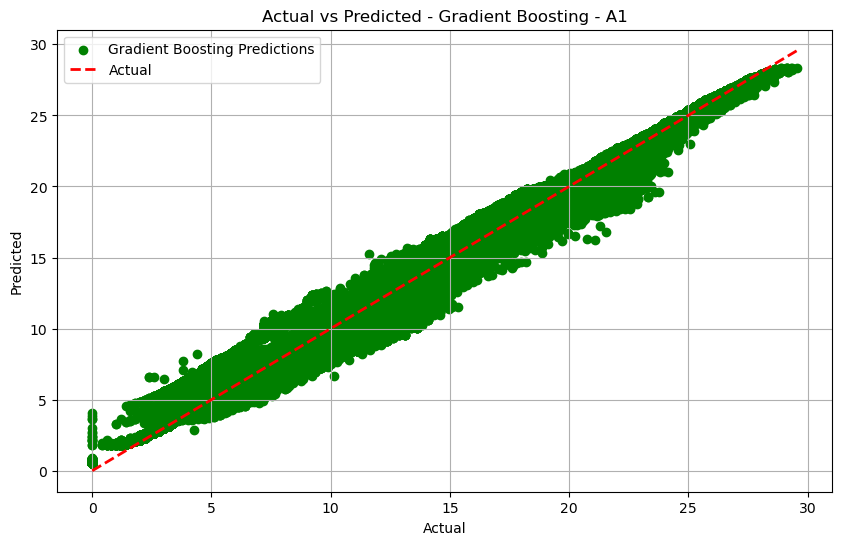

In [28]:
# Chuẩn bị cột x và y
X = df_all.drop(columns=['A', 'A1', 'B', 'C', 'D', 'year', 'sbd'])  
y = df_all['A1']  

# lọc những thằng không có giá trị 
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# huấn luyện data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=24)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2_gbr_A1 = r2_score(y_test, gbr.predict(X_test)) # Note để so sánh các biểu đồ

# Trình diễn dưới dạng biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Gradient Boosting Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Gradient Boosting - A1')
plt.legend()
plt.grid(True)
plt.show()

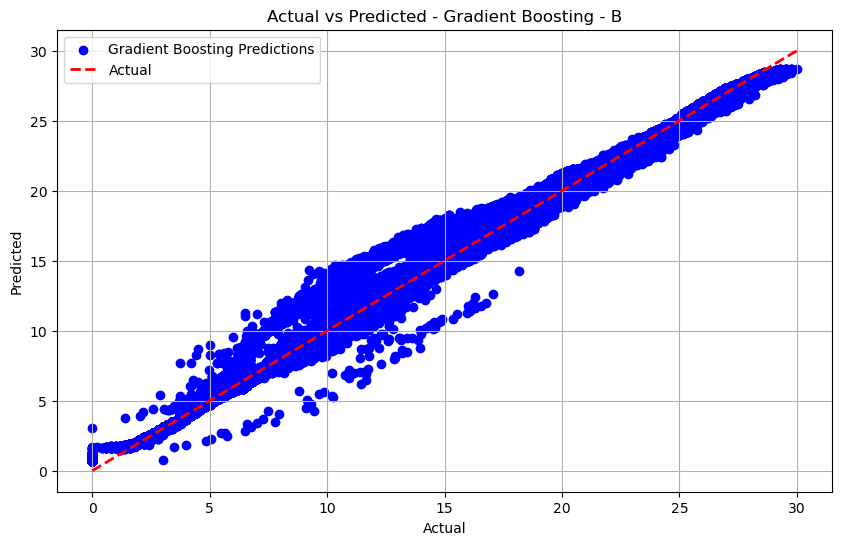

In [29]:
# Chuẩn bị cột x và y
X = df_all.drop(columns=['A', 'A1', 'B', 'C', 'D', 'year', 'sbd'])  
y = df_all['B']  

# lọc những thằng không có giá trị 
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# huấn luyện data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=24)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2_gbr_B = r2_score(y_test, gbr.predict(X_test)) # Note để so sánh các biểu đồ

# Trình diễn dưới dạng biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Gradient Boosting Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Gradient Boosting - B')
plt.legend()
plt.grid(True)
plt.show()

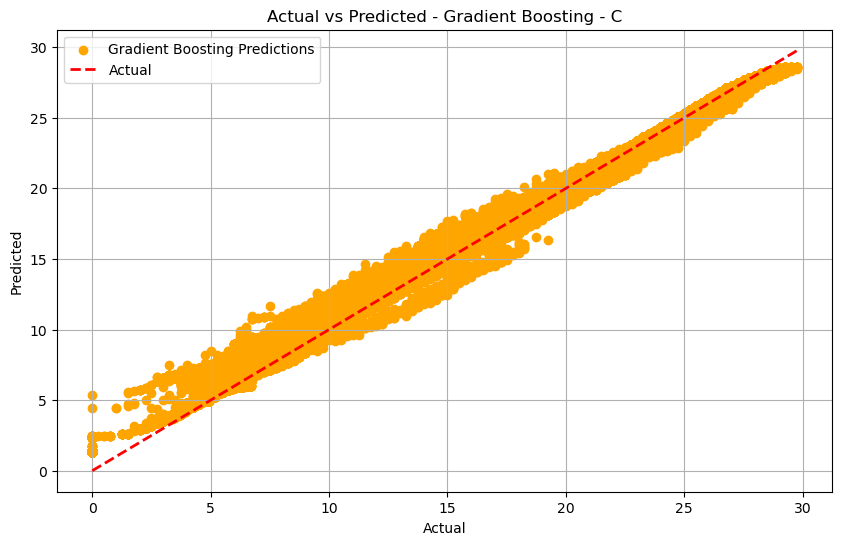

In [30]:
# Chuẩn bị cột x và y
X = df_all.drop(columns=['A', 'A1', 'B', 'C', 'D', 'year', 'sbd']) 
y = df_all['C'] 

# lọc những thằng không có giá trị 
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# huấn luyện data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=24)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2_gbr_C = r2_score(y_test, gbr.predict(X_test)) # Note để so sánh các biểu đồ

# Trình diễn dưới dạng biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange', label='Gradient Boosting Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Gradient Boosting - C')
plt.legend()
plt.grid(True)
plt.show()

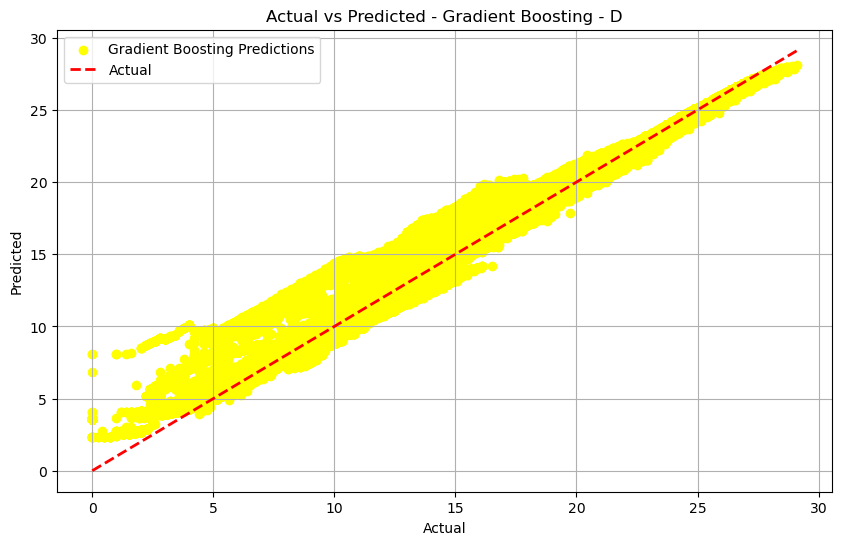

In [31]:
# Chuẩn bị cột x và y
X = df_all.drop(columns=['A', 'A1', 'B', 'C', 'D', 'year', 'sbd'])  
y = df_all['D']  # Use 'A' combination as the target

# lọc những thằng không có giá trị 
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# huấn luyện data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=24)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2_gbr_D = r2_score(y_test, gbr.predict(X_test)) # Note để so sánh các biểu đồ

# Trình diễn dưới dạng biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='yellow', label='Gradient Boosting Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Gradient Boosting - D')
plt.legend()
plt.grid(True)
plt.show()